# MNIST Digit Classification
MNIST consists of 60,000 training images and 10,000 test
images. All are grayscale (one-channel) in other words one-dimension, and each image is 28 pixels high and 28 pixels wide.

Figure shows some sample images from the MNIST
dataset.

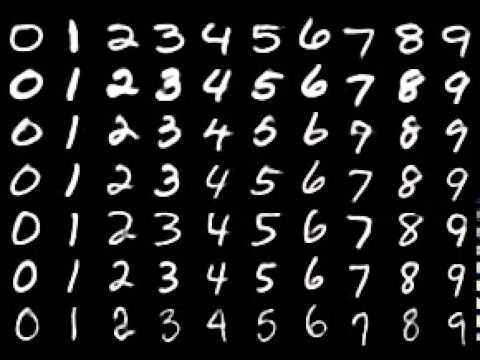

# Loading required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

## Loading the data set

In [18]:
mnist_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
mnist_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

X = mnist_train.drop(columns = ["label"])
y = mnist_train["label"]

In [19]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [21]:
# Picture size
picture_size = int(np.sqrt(X.shape[1]))
print("Picture size:",picture_size, "pixle")

Picture size: 28 pixle


In [22]:
# train data shpe
X.shape

(42000, 784)

In [23]:
# label data values
np.sort(y.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

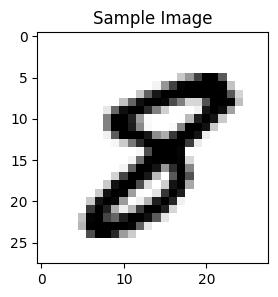

In [24]:
# Visualize a sample
some_digit = X.iloc[4000].values.reshape(28, 28)
some_digit_image = some_digit
plt.figure(figsize=(3,3))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.title("Sample Image")
plt.show()

## Data preparation

<ol>
<li>Training set is used to train the model with. </li>
<li>Validation set is used to test the train performance before testing it with the testing set, how ever it can be made by two ways: </li>
         <ol>
         <li>Manually by splitting a small portion from the train set</li>
         <li>or automatically while training the model</li>
         </ol>
<li>Test set is used to test the model perfomance i  </li>
</ol>

In [25]:
# Splitting the data into 4 sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y ,test_size=0.1, random_state=42)

In [26]:
# Data Normalization
Xtrain = Xtrain.astype('float32') / 255.
Xtest = Xtest.astype('float32') / 255.
Xtrain = Xtrain.values.reshape(-1,28,28,1)
Xtest = Xtest.values.reshape(-1,28,28,1)

In [27]:
ytrain = to_categorical(ytrain, num_classes=10)
ytest = to_categorical(ytest, num_classes=10)

# Modelling (Training/Testing)

# **CNN**
is a type of artificial neural network
(Deep Learning) used in image recognition and processing that is specifically
designed to process pixel data.

CNN like any neural network, contains some main parts:
<ol>
<li>Input layer: which is the images we want to train.</li>
<li>Conv layer which act like a feature finder window that slides over
the image pixel by pixel to extract meaningful features that identify
the objects in the image.</li>
<ol>
<li>Feature maps: is the output of each covn layer, and input of the next one.</li>
<li>Activation Function: also called "Transfare function" which is a function that transfare the data into other way of data. </li>
<li>Pooling layer: also known as subsampling or down sampling, simple process where we reduce the size or dimensionality of the Feature Map.
</li>
</ol>
<li>The Fully Connected Layer: the activation function used to produce
these probabilities is the Soft Max Function
as it turns the outputs of the FC layer (last
layer) into probabilities</li>
</ol>


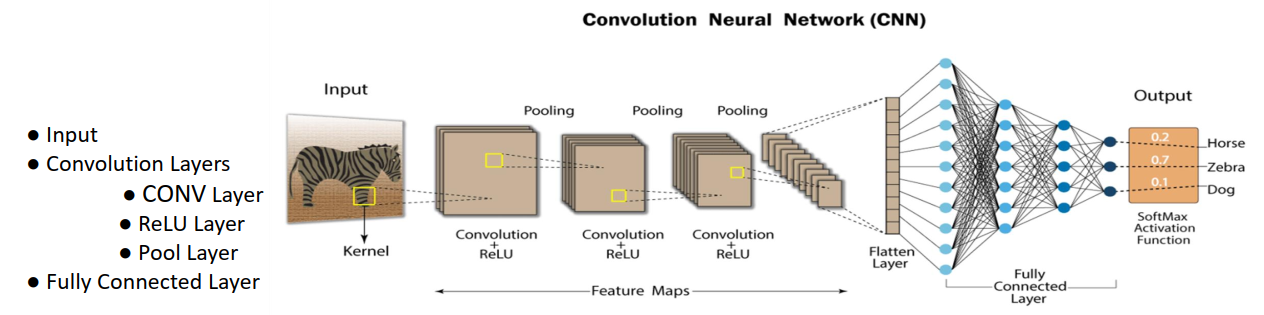

## Model Training
Model contains:
<ol>
<li>3 Conv2d Layers (Relu activation function)</li>

<li>3 MaxPooling2d Layers (Subsampling/Downscaling)</li>

<li>1 Dropout Layers (to turn off some units avoiding overfitting issues)</li>

<li>2 Dense Layers (1: Relu activation function, 1: Softmax activation function)</li>
</ol>


In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=4, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
history = model.fit(Xtrain, ytrain, epochs=30, validation_split=0.1, verbose=1, callbacks=[early_stopping])

Epoch 1/30
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8281 - loss: 0.5049 - val_accuracy: 0.9746 - val_loss: 0.0770
Epoch 2/30
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9812 - loss: 0.0642 - val_accuracy: 0.9878 - val_loss: 0.0398
Epoch 3/30
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9870 - loss: 0.0452 - val_accuracy: 0.9881 - val_loss: 0.0403
Epoch 4/30
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9891 - loss: 0.0356 - val_accuracy: 0.9831 - val_loss: 0.0586
Epoch 5/30
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9923 - loss: 0.0254 - val_accuracy: 0.9854 - val_loss: 0.0597


## Model Testing

In [30]:
evaluation = model.evaluate(Xtest, ytest)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9850 - loss: 0.0463
Test Loss: 0.03886762261390686, Test Accuracy: 0.9876190423965454


## Model Summary

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       128,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,467,892 (9.41 MB)

 Trainable params: 822,630 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,645,262 (6.28 MB)

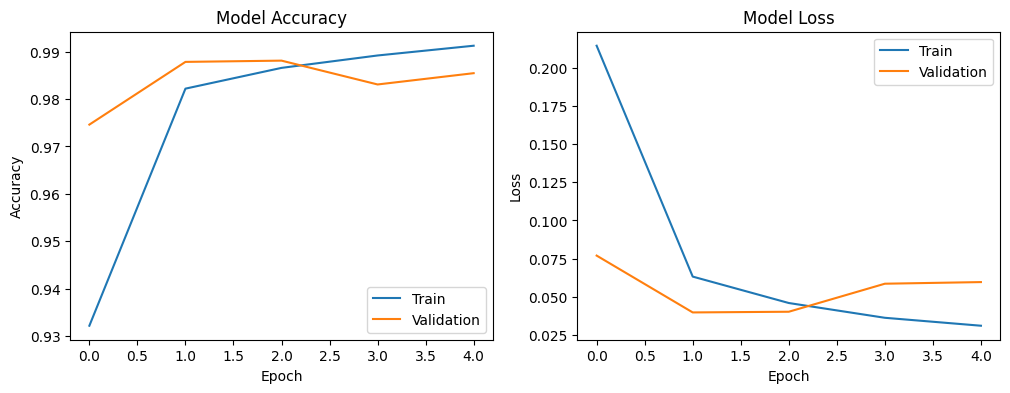

In [32]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()